In [1]:
import dask
import os
import numpy as np
import letkf_forecasting.letkf_forecasting as lf
import letkf_forecasting.tmh_plot as tmh_plot
import letkf_forecasting.analyse_results as ar
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import importlib

In [2]:
import datetime

In [3]:
from letkf_forecasting import letkf_io, analyse_results, letkf_forecasting, tmh_plot

In [51]:
# runs = ['persistence', 'opt_flow', 'wrf_no_div', 'owp_opt']#, 'radiosonde', 'wrf_mean']
runs = ['owp_opt', 'persistence', 'opt_flow', 'wrf_no_div']
# runs = ['persistence', 'opt_flow', 'wrf_no_div', 'owp_opt', 'wrf_mean']
base_folder = '/a2/uaren/travis/'
year = 2014
decimals = 3
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
bad_dates = []
persistence = pd.DataFrame(columns=[15, 30, 45, 60])
opt_flow = persistence.copy()
wrf_no_div = persistence.copy()
owp_opt = persistence.copy()

# wrf_mean = persistence.copy()

persistence_full = persistence.copy()
opt_flow_full = persistence.copy()
wrf_no_div_full = persistence.copy()
owp_opt_full = persistence.copy()

# wrf_mean_full = persistence.copy()
for this_month_day in month_day:
    month = this_month_day[0]
    day = this_month_day[1]
    try:
        returned = analyse_results.find_error_stats(
            year, month, day, runs, base_folder)
        for this_stat in returned:
            name = this_stat['name']
            this_date = this_stat['rmse'].index[0].date()
            command = (name + '.loc[this_date] = '
                + 'np.sqrt((this_stat[\'rmse\']**2).mean())')
#             print(command)
            exec(command)
            command = (name + '_full = pd.concat(['
                 + name +'_full, this_stat[\'rmse\'][[15, 30, 45, 60]]])')
#             print(command)
            exec(command)
    except:
        bad_dates.append(this_month_day)

/a2/uaren/travis/results/2014/04/09/owp_opt_000
/a2/uaren/travis/results/2014/04/09/persistence_000
/a2/uaren/travis/results/2014/04/09/opt_flow_001
/a2/uaren/travis/results/2014/04/09/wrf_no_div_001
/a2/uaren/travis/results/2014/04/15/owp_opt_000
/a2/uaren/travis/results/2014/04/15/persistence_000
/a2/uaren/travis/results/2014/04/15/opt_flow_000
/a2/uaren/travis/results/2014/04/15/wrf_no_div_000
/a2/uaren/travis/results/2014/04/18/owp_opt_000
/a2/uaren/travis/results/2014/04/18/persistence_000
/a2/uaren/travis/results/2014/04/18/opt_flow_001
/a2/uaren/travis/results/2014/04/18/wrf_no_div_000
/a2/uaren/travis/results/2014/05/06/owp_opt_000
/a2/uaren/travis/results/2014/05/06/persistence_000
/a2/uaren/travis/results/2014/05/06/opt_flow_001
/a2/uaren/travis/results/2014/05/06/wrf_no_div_000
/a2/uaren/travis/results/2014/05/09/owp_opt_000
/a2/uaren/travis/results/2014/05/09/persistence_000
/a2/uaren/travis/results/2014/05/09/opt_flow_001
/a2/uaren/travis/results/2014/05/09/wrf_no_div_000


In [5]:
persistence = persistence.sort_index()
opt_flow = opt_flow.sort_index()
wrf_no_div = wrf_no_div.sort_index()
owp_opt = owp_opt.sort_index()

# wrf_mean = wrf_mean.sort_index()

In [6]:
figsize = plt.figaspect(0.3)
xticks = [str(index.month) + '/' + str(index.day)
          for index in persistence.index]
xarange = np.arange(len(xticks))
width = 0.28

In [15]:
%matplotlib inline

In [8]:
# for hor in [15, 30, 45, 60]:
#     of_skill = 1 - opt_flow[hor]/persistence[hor]
#     wrf_skill = 1 - wrf_no_div[hor]/persistence[hor]
#     owp_skill = 1 - owp_opt[hor]/persistence[hor]
    

    
#     plt.figure(figsize=figsize)
#     plt.bar(xarange,
#             of_skill, width, color='k')
#     plt.bar(xarange + width,
#                 wrf_skill, width)
#     plt.bar(xarange + 2*width,
#                 owp_skill, width)
#     plt.xticks(xarange + width, xticks , rotation=90)
#     plt.title(f'RMSE skill score; Horizon: {hor}')
#     plt.legend(['Opt. Flow',
#                 'WRF',
#                 'Assim'])
#     plt.xlabel('Date')
#     plt.ylabel('RMSE skill score')
    
#     plt.ylim([0, None])
#     plt.tight_layout()

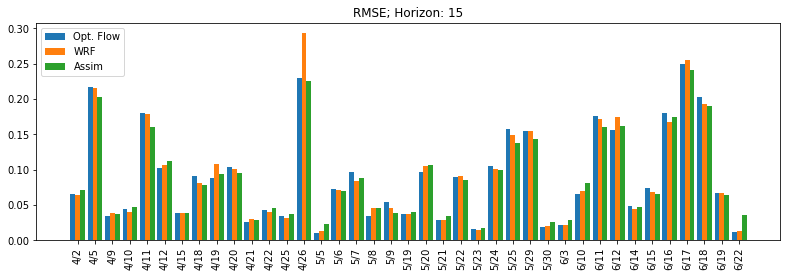

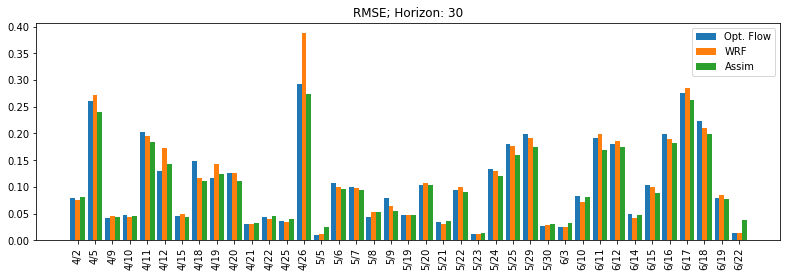

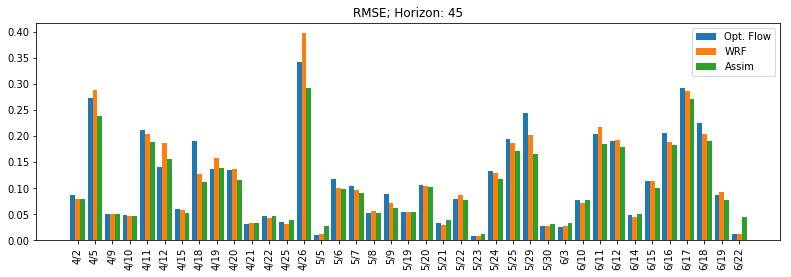

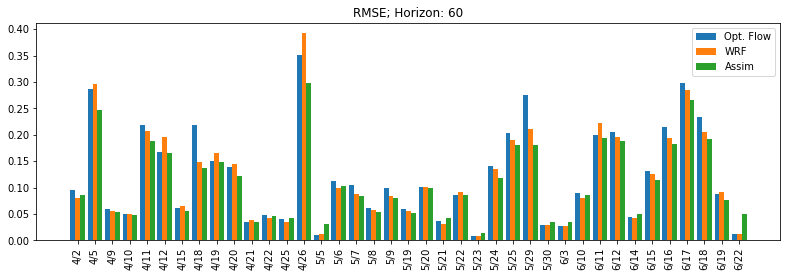

In [16]:
for hor in [15, 30, 45, 60]:
    plt.figure(figsize=figsize)
    plt.bar(xarange,
            opt_flow[hor], width)
    plt.bar(xarange + width,
            wrf_no_div[hor], width)
    plt.bar(xarange + 2*width,
            owp_opt[hor], width)
    plt.xticks(xarange + width, xticks , rotation=90)
    plt.title(f'RMSE; Horizon: {hor}')
    plt.legend(['Opt. Flow',
                'WRF',
                'Assim'])

In [203]:
persistence.loc['All Dates'] = np.sqrt((persistence_full**2).mean(axis=0))
opt_flow.loc['All Dates'] = np.sqrt((opt_flow_full**2).mean(axis=0))
wrf_no_div.loc['All Dates'] = np.sqrt((wrf_no_div_full**2).mean(axis=0))
owp_opt.loc['All Dates'] = np.sqrt((owp_opt_full**2).mean(axis=0))

# wrf_mean.loc['All_Dates'] = np.sqrt((wrf_mean_full**2).mean(axis=0))

In [204]:
peices = [owp_opt, persistence, opt_flow, wrf_no_div]
combined = pd.concat(peices, axis=1,
                    keys=['BACON', 'Persis.', 'Opt. Flow', 'NWP'],
                    names=['Method', 'Horizon'])
combined = combined.swaplevel(axis=1).sort_index(axis=1,
                                                 level='Horizon')

# peices = [persistence, opt_flow, wrf_no_div, owp_opt]
# combined = pd.concat(peices, axis=1,
#                     keys=['Persis.', 'Opt. Flow', 'WRF', 'BACON'],
#                     names=['Method', 'Horizon'])
# combined = combined.swaplevel(axis=1).sort_index(axis=1,
#                                                  level='Horizon')

In [205]:
def is_empty(str):
    return str != ''

In [206]:
def format_table(text, header_num=5, footer_num=2):
    text = text.split(' ')
    text = list(filter(is_empty, text))
    text = ' '.join(text)
    split_text = text.split('\n')
    hor_num = len(split_text[2].split('&')) - 1
    run_num = int((len(split_text[3].split('&')) - 1) / hor_num)
    
    header1 = split_text[header_num - 3].split(' ')
    for count in range(hor_num - 1):
        index = (count + 1) * 2 + 1 + count
        header1.insert(index, '&')
    header1 = ' '.join(header1)
    split_text[header_num - 3] = header1
    
    header2 = split_text[header_num - 2].split('&')
    for count in range(hor_num - 1):
        index = (count + 1) * run_num + 1 + count
        header2.insert(index, ' ')
    header2 = '&'.join(header2)
    split_text[header_num - 2] = header2
    
    header3 = ''
    buff = 1
    for count in range(hor_num):
        start = count * (run_num + 1) + 2
        end = start + run_num - 1
        header3 += f'\cmidrule(lr){{{start}-{end}}} '
    split_text[header_num - 1] = header3
    
    split_titles2 = split_text[3]
    removed = split_titles2[-2:]
    split_titles2 = split_titles2[:-2]
    split_titles2 = split_titles2.split('&')
    for count, this in enumerate(split_titles2[1:]):
        count += 1
        if len(this) > 2:
            this = this[0] + '{' + this[1:-1] + '}' + this[-1]
            split_titles2[count] = this
    split_text[3] = '&'.join(split_titles2) + removed
    for line_num, line in enumerate(split_text[header_num:-footer_num - 0]):
        split_line = line.split(' ')
        if split_line[1] != '&':
            split_line[1] = split_line[0] + ' ' + split_line[1]
            split_line = split_line[1:]
        else:
            split_line[0] = split_line[0][5:].replace('-', '/')
        for hor_count in range(hor_num):
            num_slice = slice(
                (hor_count*run_num)*2 + 2, ((hor_count + 1)*run_num)*2 + 2, 2)
            numbers_str = split_line[num_slice]
            numbers = np.array(
                split_line[num_slice],
                dtype='float')
            argmins = np.where(numbers == numbers.min())[0]
            numbers = list(numbers.astype('str'))
            for argmin in argmins:
                numbers_str[argmin] = '\\B ' + numbers_str[argmin]
#                 numbers[argmin] = '\\B ' + numbers[argmin]
#                 numbers[argmin] = '\\textbf{' + numbers[argmin] + '}'
            split_line[num_slice] = numbers_str
        for count in range(hor_num - 1):
            split_line.insert(((count + 1)*run_num)*2 + 2 + count, '&')
        split_line
        split_text[header_num + line_num] = ' '.join(split_line)
    return '\n'.join(split_text)

In [207]:
save_directory = "/home2/travis/python_code/letkf_forecasting/tables/"

In [208]:
this_combined = combined[[15, 30]]
hor_num = this_combined.columns.levels[0].size
c_num = combined.columns.size + hor_num - 1
column_format = 'l' + 'S[table-format=-1.3]' * c_num
text = this_combined.round(decimals=decimals).to_latex(
#     column_format='l|ccc|ccc|ccc|ccc',
    column_format=column_format,
    multicolumn_format='c')

In [209]:
# print(text, '\n \n')
text2 = format_table(text, footer_num=3)
print(text2)
this_file = os.path.join(save_directory, 'all_days_1.tex')
with open(this_file, 'w') as file:
    file.write(text2)

\begin{tabular}{lS[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]}
\toprule
Horizon & \multicolumn{4}{c}{15} & & \multicolumn{4}{c}{30} \\
Method & {BACON} & {Persis.} & {Opt. Flow} & {NWP} & & {BACON} & {Persis.} & {Opt. Flow} & {NWP} \\
\cmidrule(lr){2-5} \cmidrule(lr){7-10} 
04/09 & 0.037 & 0.066 & \B 0.034 & 0.038 & & 0.043 & 0.075 & \B 0.042 & 0.045 \\
04/15 & 0.039 & 0.069 & \B 0.038 & \B 0.038 & & \B 0.045 & 0.071 & 0.046 & 0.050 \\
04/18 & \B 0.078 & 0.096 & 0.091 & 0.082 & & \B 0.111 & 0.127 & 0.148 & 0.117 \\
05/06 & \B 0.070 & 0.102 & 0.073 & 0.071 & & \B 0.095 & 0.141 & 0.107 & 0.100 \\
05/09 & \B 0.039 & 0.078 & 0.054 & 0.045 & & \B 0.055 & 0.086 

In [210]:
this_combined = combined[[45, 60]]
hor_num = this_combined.columns.levels[0].size
c_num = combined.columns.size + hor_num - 1
column_format = 'l' + 'S[table-format=-1.3]' * c_num
text = this_combined.round(decimals=3).to_latex(
#     column_format='l|ccc|ccc|ccc|ccc',
    column_format=column_format,
    multicolumn_format='c')

In [211]:
# print(text, '\n \n')
text2 = format_table(text, footer_num=3)
print(text2)
this_file = os.path.join(save_directory, 'all_days_2.tex')
with open(this_file, 'w') as file:
    file.write(text2)

\begin{tabular}{lS[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]}
\toprule
Horizon & \multicolumn{4}{c}{45} & & \multicolumn{4}{c}{60} \\
Method & {BACON} & {Persis.} & {Opt. Flow} & {NWP} & & {BACON} & {Persis.} & {Opt. Flow} & {NWP} \\
\cmidrule(lr){2-5} \cmidrule(lr){7-10} 
04/09 & \B 0.050 & 0.076 & 0.051 & 0.051 & & \B 0.054 & 0.072 & 0.059 & 0.055 \\
04/15 & \B 0.052 & 0.075 & 0.059 & 0.059 & & \B 0.056 & 0.085 & 0.062 & 0.065 \\
04/18 & \B 0.111 & 0.139 & 0.190 & 0.127 & & \B 0.136 & 0.152 & 0.219 & 0.148 \\
05/06 & \B 0.098 & 0.156 & 0.118 & 0.099 & & 0.103 & 0.139 & 0.112 & \B 0.099 \\
05/09 & \B 0.062 & 0.082 & 0.088 & 0.071 & & \B 0.080 & 0.083 & 0

In [212]:
this_combined = combined[[15, 30, 45, 60]]
hor_num = this_combined.columns.levels[0].size
c_num = combined.columns.size + hor_num - 1
column_format = 'l' + 'S[table-format=-1.3]' * c_num
text = this_combined.round(decimals=3).to_latex(
#     column_format='l|ccc|ccc|ccc|ccc',
    column_format=column_format,
    multicolumn_format='c')

In [213]:
# print(text, '\n \n')
text2 = format_table(text, footer_num=3)
print(text2)
this_file = os.path.join(save_directory, 'all_days_3.tex')
with open(this_file, 'w') as file:
    file.write(text2)

\begin{tabular}{lS[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]S[table-format=-1.3]}
\toprule
Horizon & \multicolumn{4}{c}{15} & & \multicolumn{4}{c}{30} & & \multicolumn{4}{c}{45} & & \multicolumn{4}{c}{60} \\
Method & {BACON} & {Persis.} & {Opt. Flow} & {NWP} & & {BACON} & {Persis.} & {Opt. Flow} & {NWP} & & {BACON} & {Persis.} & {Opt. Flow} & {NWP} & & {BACON} & {Persis.} & {Opt. Flow} & {NWP} \\
\cmidrule(lr){2-5} \cmidrule(lr){7-10} \cmidrule(lr){12-15} \cmidrule(lr){17-20} 
04/09 & 0.037 & 0.066 & \B 0.034 & 0.038 & & 0.043 & 0.075 & \B 0.042 & 0.045 & & \B 0.050 & 0.076 & 0.051 & 0.051 & & \B 0.054 & 0.072 & 0.059 & 0.055 \\
04/15 & 0.039 & 0.069 & \B 0.038 & \B 0.038 & 

In [214]:
this_combined = combined.iloc[:20]
hor_num = this_combined.columns.levels[0].size
c_num = combined.columns.size + hor_num - 1
column_format = 'l' + 'S[table-format=-1.3]' * c_num
text = this_combined.round(decimals=3).to_latex(
    column_format=column_format,
    multicolumn_format='c')

In [215]:
# print(text, '\n \n')
text2 = format_table(text)
print(text2)

IndexError: list index out of range